<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Разделение-на-выборки" data-toc-modified-id="Разделение-на-выборки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Разделение на выборки</a></span></li><li><span><a href="#Масштабирование-признаков" data-toc-modified-id="Масштабирование-признаков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Масштабирование признаков</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обучение моделей</a></span></li><li><span><a href="#Проверка-моделей-на-адекватность" data-toc-modified-id="Проверка-моделей-на-адекватность-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Проверка моделей на адекватность</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Сбалансируем-выборку" data-toc-modified-id="Сбалансируем-выборку-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Сбалансируем выборку</a></span><ul class="toc-item"><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Upsampling</a></span></li><li><span><a href="#Downsamling" data-toc-modified-id="Downsamling-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Downsamling</a></span></li></ul></li><li><span><a href="#Обучение-моделей-на-сбалансированной-выборке" data-toc-modified-id="Обучение-моделей-на-сбалансированной-выборке-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение моделей на сбалансированной выборке</a></span><ul class="toc-item"><li><span><a href="#Обучение-моделей-на-увеличенной-выборке" data-toc-modified-id="Обучение-моделей-на-увеличенной-выборке-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Обучение моделей на увеличенной выборке</a></span></li><li><span><a href="#Обучение-моделей-на-уменьшенной-выборке" data-toc-modified-id="Обучение-моделей-на-уменьшенной-выборке-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Обучение моделей на уменьшенной выборке</a></span></li></ul></li><li><span><a href="#Улучшаем-модель-случайного-леса" data-toc-modified-id="Улучшаем-модель-случайного-леса-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Улучшаем модель случайного леса</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [ ]:
#импортируем необходимые для работы библиотеки
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle

In [ ]:
data = pd.read_csv('/datasets/Churn.csv') #считаем данные и сохраним их в переменной data
data.head(10) #выведем первые 10 строк датафрейма на экран

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [ ]:
data.info() #также изучим основную информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Всего в датафрейме 10000 строк, пропуски есть только в столбце Tenure (сколько лет человек является клиентом банка). Этот признак будет важен для обучения моделей, поэтому заполним пропуски в нём с помощью медианного значения:

In [ ]:
data['Tenure'] = data['Tenure'].fillna(data['Tenure'].median())

In [ ]:
data['Tenure'].isna().sum()

0

Пропуски устранены. Посмотрим, есть ли дубликаты:

In [ ]:
data.duplicated().sum()

0

Дубликатов тоже нет - можно двигаться дальше. В датафрейме есть столбцы RowNumber (номер строки), CustomerId (айди клиента) и Surname (фамилия клиента). Эти данные никак не влияют на целевой признак - уход из банка, - но могут запутать модель. Удалим эти столбцы.

In [ ]:
data = data.drop(['RowNumber','CustomerId', 'Surname'], axis=1) #удалим лишние столбцы
data.shape #посмотрим на размер обновлённого датафрейма

(10000, 11)

Также мы видим два столбца-признака с категориальными данными - Gender (пол клиента) и Geography (страна проживания). Посмотрим на уникальные значения в этих столбцах:

In [ ]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

2 и 3 значения соответственно. Преобразуем эти колонки техникой OHE. Чтобы не попасть в дамми-ловушку, применим аргумент drop_first функции pd.get_dummies().

In [ ]:
data = pd.get_dummies(data, drop_first=True)
data.shape #посмотрим на размер обновлённого датафрейма

(10000, 12)

Во всех остальных столбцах преобразование данных не требуется - в них содержатся или числовые данные, или категориальные данные, подходящие для дальнейшего обучения моделей.

**Вывод:** мы изучили исходные данные и подготовили их для дальнейшего машинного обучения: устранили пропуски, убедились в отсутствии дубликатов, удалили лишние столбцы и преобразовали некоторые данные с помощью OHE.

## Исследование задачи

### Разделение на выборки

Разделим данные на выборки: обучающую, валидационную и тестовую. В данном исследовании нет скрытой тестовой выборки, поэтому разделим данные в пропорции 3:1:1.

In [ ]:
#укажем признаки и целевой признак
features = data.drop('Exited', axis=1)
target = data['Exited']

Стоит отметить, что целевой признак - Exited - это категориальное значение. Соответсвенно, в исследовании мы будем пользоваться методами классификации, а не регрессии.

Сначала разобьём данные на обучающую и тестовую выборку. features_train - обучающие параметры, features_test - тестовые параметры, target_train - обучающее целевое значение, target_test - тестовое целевое значение. Так как мы разбиваем данные в соотношении 60%-20%-20%, и сейчас мы отделяем тестовую выборку, в которую входит и валидационная, в параметр test_size мы передадим 0.2+0.2=0.4. Также зададим параметр псевдослучайных чисел random_state.

In [ ]:
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target,
                                                                            test_size=0.4,
                                                                            random_state=12345
                                                                           )

Посмотрим на размер обучающей выборки:

In [ ]:
print(features_train.shape)
print(target_train.shape)

(6000, 11)
(6000,)


Теперь разобьём тестовую часть выборки на тестовую и валидационную: в параметр test_size мы передадим 0.5, поскольку сейчас мы работаем с 40% исходных данных (features_test и target_test), и нам нужно разделить их пополам и получить изначальное сооношение 3:1:1.

In [ ]:
features_valid, features_test, target_valid, target_test = train_test_split(features_test,
                                                                            target_test,
                                                                            test_size=0.5,
                                                                            random_state=12345
                                                                           )

Посмотрим на размеры валидационной выборки:

In [ ]:
print(features_valid.shape)
print(target_valid.shape)

(2000, 11)
(2000,)


Посмотрим на размеры тестовой выборки:

In [ ]:
print(features_test.shape)
print(target_test.shape)

(2000, 11)
(2000,)


Данные разделены верно, в соотношении 3:1:1.

### Масштабирование признаков

Стандартизируем данные:

In [ ]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'] #зафиксируем числовые признаки
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric]) #масштабируем численные признаки обучающей выборки
features_valid[numeric] = scaler.transform(features_valid[numeric]) #масштабируем численные признаки валидационной выборки
features_test[numeric] = scaler.transform(features_test[numeric]) #масштабируем численные признаки тестовой выборки
pd.options.mode.chained_assignment = None

/tmp/ipykernel_32/3463045475.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric]) #масштабируем численные признаки обучающей выборки
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Выведем по пять строк каждой группы признаков (обучающих, валидационных, тестовых), чтобы убедиться, что масштабирование прошло успешно.

In [ ]:
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7479,-0.886751,-0.373192,1.082277,1.232271,-0.891560,1,0,-0.187705,0,1,1
3411,0.608663,-0.183385,1.082277,0.600563,-0.891560,0,0,-0.333945,0,0,0
6027,2.052152,0.480939,-0.737696,1.027098,0.830152,0,1,1.503095,1,0,1
1247,-1.457915,-1.417129,0.354288,-1.233163,0.830152,1,0,-1.071061,0,0,1
3716,0.130961,-1.132419,-1.101690,1.140475,-0.891560,0,0,1.524268,1,0,0


In [ ]:
features_valid.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
8532,-0.699824,-0.373192,-1.101690,-1.233163,0.830152,1,0,-0.015173,0,0,0
5799,-0.284431,0.575842,-0.737696,-1.233163,-0.891560,1,1,1.471724,0,0,0
5511,0.151731,-0.657902,-1.829679,0.438711,-0.891560,1,0,-1.367107,1,0,1
7365,-0.876366,-0.278288,1.810266,1.239884,-0.891560,1,1,-0.786517,0,1,0
7367,-0.481743,0.291132,1.810266,-1.233163,0.830152,1,0,1.358533,0,1,1


In [ ]:
features_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7041,-2.226392,-0.088482,-1.101690,-1.233163,0.830152,1,0,0.647083,0,0,1
5709,-0.087120,0.006422,1.446272,-1.233163,-0.891560,1,0,-1.658410,0,0,0
7117,-0.917905,-0.752805,-0.009707,0.722307,-0.891560,1,1,-1.369334,0,1,1
7775,-0.253277,0.101325,1.810266,-1.233163,0.830152,1,0,0.075086,0,1,1
8735,0.785204,-0.847708,1.810266,0.615625,-0.891560,0,1,-1.070919,0,0,1


### Обучение моделей

Обучим три модели: решающее дерево, случайный лес, логистическую регрессию. Сравним точность этих моделей.

In [ ]:
#обучаем решающее дерево
model_tree = DecisionTreeClassifier(random_state=12345)
model_tree.fit(features_train, target_train)
predictions_valid_tree = model_tree.predict(features_valid)
probabilities_valid_tree = model_tree.predict_proba(features_valid)
probabilities_one_valid_tree = probabilities_valid_tree[:, 1]
#рассчитаем значение accuracy
accuracy_tree = accuracy_score(predictions_valid_tree, target_valid)

In [ ]:
#обучаем случайный лес
model_forest = RandomForestClassifier(random_state=12345)
model_forest.fit(features_train, target_train)
predictions_valid_forest = model_forest.predict(features_valid)
probabilities_valid_forest = model_forest.predict_proba(features_valid)
probabilities_one_valid_forest = probabilities_valid_forest[:, 1]
#рассчитаем значение accuracy
accuracy_forest = accuracy_score(predictions_valid_forest, target_valid)

In [ ]:
#обучаем логистическую регрессию
model_regr = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
model_regr.fit(features_train, target_train)
predictions_valid_regr = model_regr.predict(features_valid)
probabilities_valid_regr = model_regr.predict_proba(features_valid)
probabilities_one_valid_regr = probabilities_valid_regr[:, 1]
#рассчитаем значение accuracy
accuracy_regr = accuracy_score(predictions_valid_regr, target_valid)

In [ ]:
print('Значение accuracy:')
print('Решающее дерево:', accuracy_tree)
print('Случайный лес:', accuracy_forest)
print('Логистическая регрессия:', accuracy_regr)

Значение accuracy:
Решающее дерево: 0.7935
Случайный лес: 0.8585
Логистическая регрессия: 0.802


Все значения достаточно высокие, выше всего значение у случайного леса (0,8585). Нужно проверить модели на адекватность.

### Проверка моделей на адекватность

Для начала проверим, как часто в целевом признаке встречается класс «1» или «0».

0    0.7963
1    0.2037
Name: Exited, dtype: float64


<AxesSubplot:>

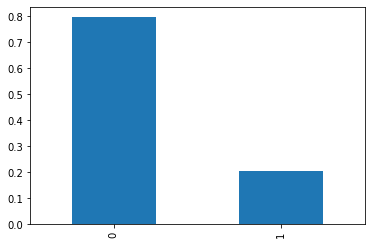

In [ ]:
class_frequency = data['Exited'].value_counts(normalize=True)
print(class_frequency)


class_frequency.plot(kind='bar')

Заметно, что наблюдается значительный дисбаланс классов: значение "0" - около 80%, значение "1" - около 20%. Можно ожидать, что результаты предсказаний моделей будут сильно склоняться к одному варианту ответов.

Проанализируем частоты классов в результатах предсказаний наших трёх моделей:

0    0.7955
1    0.2045
dtype: float64


<AxesSubplot:>

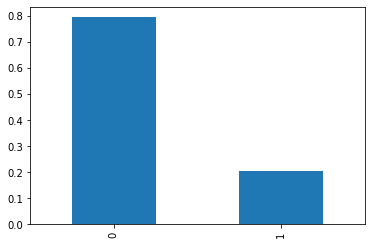

In [ ]:
#для решающего дерева:
predictions_valid_tree = pd.Series(predictions_valid_tree)
class_frequency_tree = predictions_valid_tree.value_counts(normalize=True)
print(class_frequency_tree)


class_frequency_tree.plot(kind='bar')

0    0.8745
1    0.1255
dtype: float64


<AxesSubplot:>

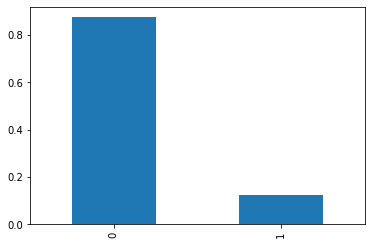

In [ ]:
#для случайного леса:
predictions_valid_forest = pd.Series(predictions_valid_forest)
class_frequency_forest = predictions_valid_forest.value_counts(normalize=True)
print(class_frequency_forest)


class_frequency_forest.plot(kind='bar')

0    0.913
1    0.087
dtype: float64


<AxesSubplot:>

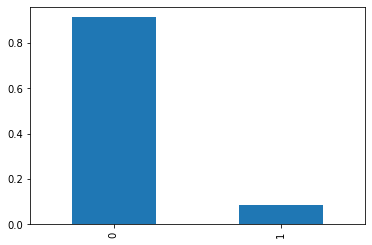

In [ ]:
#для логистической регрессии:
predictions_valid_regr = pd.Series(predictions_valid_regr)
class_frequency_regr = predictions_valid_regr.value_counts(normalize=True)
print(class_frequency_regr)


class_frequency_regr.plot(kind='bar')

У всех трёх моделей также наблюдается схожий дисбаланс в предсказаниях - подавляющее большинство занимает класс ответов "0".

Также сравним качество предсказаний всех трёх моделей с константной моделью - она всегда будет прогнозировать класс "0".

In [ ]:
target_predict_constant = pd.Series([0]*len(target))
print('Значение accuracy:')
print('Решающее дерево:', accuracy_tree)
print('Случайный лес:', accuracy_forest)
print('Логистическая регрессия:', accuracy_regr)
print('Константная модель:', accuracy_score(target, target_predict_constant))

Значение accuracy:
Решающее дерево: 0.7935
Случайный лес: 0.8585
Логистическая регрессия: 0.802
Константная модель: 0.7963


Таким образом, accuracy всех рассмотренных нами моделей близка или чуть выше accuracy константной модели. Это означает, что ни одна модель не прошла проверку на адекватность из-за выраженного дисбаланса классов. Посмотрим на матрицу ошибок для кажой модели, чтобы подробнее изучить проблему:

In [ ]:
print('Матрица ошибок решающего дерева:', confusion_matrix(target_valid, predictions_valid_tree))
print()
print('Матрица ошибок случайного леса:', confusion_matrix(target_valid, predictions_valid_forest))
print()
print('Матрица ошибок логистической регрессии:', confusion_matrix(target_valid, predictions_valid_regr))

Матрица ошибок решающего дерева: [[1380  202]
 [ 211  207]]

Матрица ошибок случайного леса: [[1524   58]
 [ 225  193]]

Матрица ошибок логистической регрессии: [[1506   76]
 [ 320   98]]


У всех трёх моделей большая доля ложно отрицательных (FN) ответов, особенно у логистической регрессии. Решающее дерево также склонно давать ложно положительные (FP) ответы. Также посмотрим на полноту, точность и меру F-1 для всех моделей:

In [ ]:
print('Решающее дерево:')
print('Полнота:', recall_score(target_valid, predictions_valid_tree))
print('Точность:', precision_score(target_valid, predictions_valid_tree))
print('F-1:', f1_score(target_valid, predictions_valid_tree))
print('AUC-ROC:', roc_auc_score(target_valid, probabilities_one_valid_tree))
print()
print('Случайный лес:')
print('Полнота:', recall_score(target_valid, predictions_valid_forest))
print('Точность:', precision_score(target_valid, predictions_valid_forest))
print('F-1:', f1_score(target_valid, predictions_valid_forest))
print('AUC-ROC:', roc_auc_score(target_valid, probabilities_one_valid_forest))
print()
print('Логистическая регрессия:')
print('Полнота:', recall_score(target_valid, predictions_valid_regr))
print('Точность:', precision_score(target_valid, predictions_valid_regr))
print('F-1:', f1_score(target_valid, predictions_valid_regr))
print('AUC-ROC:', roc_auc_score(target_valid, probabilities_one_valid_regr))

Решающее дерево:
Полнота: 0.49521531100478466
Точность: 0.5061124694376528
F-1: 0.5006045949214026
AUC-ROC: 0.6837644190927842

Случайный лес:
Полнота: 0.46172248803827753
Точность: 0.7689243027888446
F-1: 0.5769805680119582
AUC-ROC: 0.840733672475638

Логистическая регрессия:
Полнота: 0.23444976076555024
Точность: 0.5632183908045977
F-1: 0.33108108108108103
AUC-ROC: 0.7588026784580114


У всех моделей низкое значение полноты - это значит, модели плохо определяют истино положительные (TP) ответы. Значение точности немного выше, лучше всего себя показала модель случайного леса с точностью 0.7689243027888446. Значение F-1 для всех моделей также достаточно низкое, особенно у логистической регрессии (0.33108108108108103). Все эти значения свидетельствуют о низком качестве моделей, обусловленным дисбалансом классов.

**Вывод:** мы разделили данные на выборки: обучающую, валидационную и тестовую. В данном исследовании нет скрытой тестовой выборки, поэтому мы разделили данные в пропорции 3:1:1. Мы масштабировали числовые признаки, чтобы сбалансировать и стандартизировать данные. Затем мы обучили три модели: решающего дерева, случайного леса и логистической регрессии - все модели показали достаточно высокое значение accuracy. Далее мы проверили модели на адекватность и выяснили, что в исходных данных наблюдается заметный дисбаланс классов: значение "0" - около 80%, значение "1" - около 20%. Результаты предсказания всех трёх моделей сохранили в себе такой же дисбаланс. Сравнив значение accuracy наших моделей со значением accuracy константной модели, которая всегда прогнозирует класс "0", мы убедились, что accuracy всех рассмотренных нами моделей близка или чуть выше accuracy константной модели, что означает, что модели проверку на адекватность не прошли. Матрица ошибок всех моделей показала, что они все склонны предсказывать ложно отрицательные (FN) ответы, решающее дерево также склонно давать ложно положительные (FP) ответы. Мы также проверили значения полноты, точности и F-1 для всех моделей. У всех моделей низкое значение полноты - это значит, модели плохо определяют истино положительные (TP) ответы. Значение F-1 для всех моделей также достаточно низкое, особенно у логистической регрессии (0.33108108108108103). Все эти значения свидетельствуют о низком качестве моделей, обусловленным дисбалансом классов.

## Борьба с дисбалансом

### Сбалансируем выборку

В предыдущем пункте исследования мы выяснили, что в исходных данных соотношение классов "0" и "1" составляет 80%:20%. Чтобы достичь баланса, нам нужно увеличить количество положительных ответов (класс "1") в 4 раза или наоборот уменьшить количество отрицательных ответов (класс "0") также в 4 раза. Для этого применим технику upsampling и downsampling. Для этого нужно:
1) Разделить обучающую выборку на отрицательные и положительные объекты.

2) Скопировать несколько раз положительные объекты или случайным образом отбросить часть из отрицательных объектов.

3) С учётом полученных данных создать новую обучающую выборку.

4) Перемешать данные.

После этого можно будет обучить новые модели.

#### Upsampling

In [ ]:
#создадим функцию, которая принимает три параметрама: features — признаки, target — целевой признак,
#repeat — количество повторений.
#функция вернёт признаки и целевой признак после операции upsampling.
def upsample(features, target, repeat):
    features_zeros = features[target == 0] #разделяем обучающую выборку на отрицательные и положительные объекты
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    #копируем несколько раз положительные объекты
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    #перемешиваем данные
    features_upsampled, target_upsampled = shuffle(features_upsampled,
                                                   target_upsampled, random_state=12345)

    return features_upsampled, target_upsampled

features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 4)

print(target_train.shape) #посмотрим на размеры обучающей выборки до и после upsampling
print(target_train_upsampled.shape)

(6000,)
(9588,)


Мы успешно увеличили обучающую выборку. Посмотрим на распределение классов в новой выборке:

0    0.501043
1    0.498957
Name: Exited, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


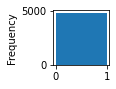

In [ ]:
print(target_train_upsampled.value_counts(normalize = 1))
print()
print(target_train_upsampled.plot(kind ='hist', bins=2, figsize=(1,1)))

#### Downsamling

In [ ]:
#создадим функцию, которая принимает три параметрама: features — признаки, target — целевой признак,
#fraction — доля отрицательных объектов, которые нужно сохранить.
#функция вернёт признаки и целевой признак после операции downsampling.
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(
        frac=fraction, random_state=12345)] + [features_ones]
                                    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled

features_train_downsampled, target_train_downsampled = downsample(features_train, target_train, 0.25)

print(target_train.shape) #посмотрим на размеры обучающей выборки до и после downsampling
print(target_train_downsampled.shape)

(6000,)
(2397,)


Мы успешно уменьшили обучающую выборку. Посмотрим на распределение классов в новой выборке:

0    0.501043
1    0.498957
Name: Exited, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


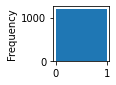

In [ ]:
print(target_train_downsampled.value_counts(normalize = 1))
print()
print(target_train_downsampled.plot(kind ='hist', bins=2, figsize=(1,1)))

Теперь классы сбалансированы. Можно заново обучить модели на увеличенной и уменьшенной сбалансированной выборках и сравнить результаты.

### Обучение моделей на сбалансированной выборке

Также обучим три модели: решающее дерево, случайный лес и логистическую регрессию. Для всех моделей сразу оценим полноту, точность, F-1 и AUC-ROC, чтобы выбрать модель с самыми высокими параметрами.

#### Обучение моделей на увеличенной выборке

In [ ]:
#обучим решающее дерево
model_tree_upsampled = DecisionTreeClassifier(random_state=12345)
model_tree_upsampled.fit(features_train_upsampled, target_train_upsampled)
predictions_valid_tree_upsampled = model_tree_upsampled.predict(features_valid)
probabilities_valid_tree_upsampled = model_tree_upsampled.predict_proba(features_valid)
probabilities_one_valid_tree_upsampled = probabilities_valid_tree_upsampled[:, 1]

#выведем параметры
print('Решающее дерево:')
print('Полнота:', recall_score(target_valid, predictions_valid_tree_upsampled))
print('Точность:', precision_score(target_valid, predictions_valid_tree_upsampled))
print('F-1:', f1_score(target_valid, predictions_valid_tree_upsampled))
print('AUC-ROC:', roc_auc_score(target_valid, probabilities_one_valid_tree_upsampled))

Решающее дерево:
Полнота: 0.48564593301435405
Точность: 0.4951219512195122
F-1: 0.49033816425120774
AUC-ROC: 0.6773994519686183


In [ ]:
#обучим случайный лес
model_forest_upsampled = RandomForestClassifier(random_state=12345)
model_forest_upsampled.fit(features_train_upsampled, target_train_upsampled)
predictions_valid_forest_upsampled = model_forest_upsampled.predict(features_valid)
probabilities_valid_forest_upsampled = model_forest_upsampled.predict_proba(features_valid)
probabilities_one_valid_forest_upsampled = probabilities_valid_forest_upsampled[:, 1]

#выведем параметры
print('Случайный лес:')
print('Полнота:', recall_score(target_valid, predictions_valid_forest_upsampled))
print('Точность:', precision_score(target_valid, predictions_valid_forest_upsampled))
print('F-1:', f1_score(target_valid, predictions_valid_forest_upsampled))
print('AUC-ROC:', roc_auc_score(target_valid, probabilities_one_valid_forest_upsampled))

Случайный лес:
Полнота: 0.5502392344497608
Точность: 0.6804733727810651
F-1: 0.6084656084656085
AUC-ROC: 0.8396471367477422


In [ ]:
#обучим логистическую регрессию
model_regr_upsampled = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
model_regr_upsampled.fit(features_train_upsampled, target_train_upsampled)
predictions_valid_regr_upsampled = model_regr_upsampled.predict(features_valid)
probabilities_valid_regr_upsampled = model_regr_upsampled.predict_proba(features_valid)
probabilities_one_valid_regr_upsampled = probabilities_valid_regr_upsampled[:, 1]

#выведем параметры
print('Логистическая регрессия:')
print('Полнота:', recall_score(target_valid, predictions_valid_regr_upsampled))
print('Точность:', precision_score(target_valid, predictions_valid_regr_upsampled))
print('F-1:', f1_score(target_valid, predictions_valid_regr_upsampled))
print('AUC-ROC:', roc_auc_score(target_valid, probabilities_one_valid_regr_upsampled))

Логистическая регрессия:
Полнота: 0.6818181818181818
Точность: 0.3810160427807487
F-1: 0.4888507718696398
AUC-ROC: 0.7636206364664678


#### Обучение моделей на уменьшенной выборке

In [ ]:
#обучим решающее дерево
model_tree_downsampled = DecisionTreeClassifier(random_state=12345)
model_tree_downsampled.fit(features_train_downsampled, target_train_downsampled)
predictions_valid_tree_downsampled = model_tree_downsampled.predict(features_valid)
probabilities_valid_tree_downsampled = model_tree_downsampled.predict_proba(features_valid)
probabilities_one_valid_tree_downsampled = probabilities_valid_tree_downsampled[:, 1]

#выведем параметры
print('Решающее дерево:')
print('Полнота:', recall_score(target_valid, predictions_valid_tree_downsampled))
print('Точность:', precision_score(target_valid, predictions_valid_tree_downsampled))
print('F-1:', f1_score(target_valid, predictions_valid_tree_downsampled))
print('AUC-ROC:', roc_auc_score(target_valid, probabilities_one_valid_tree_downsampled))

Решающее дерево:
Полнота: 0.6985645933014354
Точность: 0.3748395378690629
F-1: 0.4878863826232247
AUC-ROC: 0.6953632068909199


In [ ]:
#обучим случайный лес
model_forest_downsampled = RandomForestClassifier(random_state=12345)
model_forest_downsampled.fit(features_train_downsampled, target_train_downsampled)
predictions_valid_forest_downsampled = model_forest_downsampled.predict(features_valid)
probabilities_valid_forest_downsampled = model_forest_downsampled.predict_proba(features_valid)
probabilities_one_valid_forest_downsampled = probabilities_valid_forest_downsampled[:, 1]

#выведем параметры
print('Случайный лес:')
print('Полнота:', recall_score(target_valid, predictions_valid_forest_downsampled))
print('Точность:', precision_score(target_valid, predictions_valid_forest_downsampled))
print('F-1:', f1_score(target_valid, predictions_valid_forest_downsampled))
print('AUC-ROC:', roc_auc_score(target_valid, probabilities_one_valid_forest_downsampled))

Случайный лес:
Полнота: 0.7440191387559809
Точность: 0.47192716236722304
F-1: 0.5775301764159704
AUC-ROC: 0.8452907711757269


In [ ]:
#обучим логистическую регрессию
model_regr_downsampled = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
model_regr_downsampled.fit(features_train_downsampled, target_train_downsampled)
predictions_valid_regr_downsampled = model_regr_downsampled.predict(features_valid)
probabilities_valid_regr_downsampled = model_regr_downsampled.predict_proba(features_valid)
probabilities_one_valid_regr_downsampled = probabilities_valid_regr_downsampled[:, 1]

#выведем параметры
print('Логистическая регрессия:')
print('Полнота:', recall_score(target_valid, predictions_valid_regr_downsampled))
print('Точность:', precision_score(target_valid, predictions_valid_regr_downsampled))
print('F-1:', f1_score(target_valid, predictions_valid_regr_downsampled))
print('AUC-ROC:', roc_auc_score(target_valid, probabilities_one_valid_regr_downsampled))

Логистическая регрессия:
Полнота: 0.6722488038277512
Точность: 0.3781965006729475
F-1: 0.48406546080964685
AUC-ROC: 0.7622203134545938


Мы обучили по три модели на увеличенной и уменьшенной выборках и изучили их параметры качества. Лучше всего себя показала модель случайного леса на увеличенной выборке: её значение F-1 - 0.6084656084656085 (что уже превышает пороговое), а AUC-ROC - 0.8396471367477422. На уменьшенной выборке её значение F-1 - 0.5775301764159704, AUC-ROC - 0.8452907711757269. У решающего дерева на увеличенной выборке F-1 составляет 0.49033816425120774, AUC-ROC - 0.6773994519686183; на уменьшенной выборке F-1 - 0.4878863826232247, AUC-ROC - 0.6953632068909199. Наконец, у логистической регрессии на увеличенной выборке F-1 - 0.4888507718696398, AUC-ROC - 0.7636206364664678; на уменьшенной выборке F-1 - 0.48406546080964685, AUC-ROC - 0.7622203134545938. Следует выбрать модель случайного леса на увеличенной выборке и попробовать улучшить её с помощью изменения гиперпараметров, чтобы повысить значение F-1.

### Улучшаем модель случайного леса

In [ ]:
#создадим цикл, который переберёт гиперпараметры и выберет лучшие на основании наиболее высокого значения F-1
best_model_forest = None
best_est_forest = 0
best_depth_forest = 0
best_f_1_forest = 0
for est in range(1, 50):
    for depth in range(1, 50):
        model_forest_upsampled = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth = depth)
        model_forest_upsampled.fit(features_train_upsampled, target_train_upsampled)
        predictions_valid_forest_upsampled = model_forest_upsampled.predict(features_valid)
        f_1_forest = f1_score(target_valid, predictions_valid_forest_upsampled)
        if best_f_1_forest < f_1_forest:
            best_model_forest = model_forest
            best_est_forest = est
            best_depth_forest = depth
            best_f_1_forest = f_1_forest

print('Лучшее значение n_estimators:', best_est_forest)
print('Лучшее значение max_depth:', best_depth_forest)
print('Лучшее значение F-1:', best_f_1_forest)

Лучшее значение n_estimators: 26
Лучшее значение max_depth: 8
Лучшее значение F-1: 0.6302780638516993


Итак, наиболее удачной моделью будет модель случайного леса с  с гиперпараметрами n_estimators (количеством деревьев), равным 26, и max_depth (глубиной дерева), равным 8. Такая модель даёт значение F-1 равное 0.6302780638516993. Проверим эту модель на тестовой выборке.

**Вывод:** мы сбалансировали обучающую выборку с помощью upsampling и downsampling, тем самым достигнув соотношения классов 50,1%:49,8%. Мы заново обучили три модели на увеличенной и уменьшенной выборках, сравнили их параметры полноты, точности, F-1 и AUC-ROC. Лучше всего себя показала модель случайного леса: её значение F-1 - 0.6084656084656085 (что уже превышает пороговое), а AUC-ROC - 0.8396471367477422. Затем мы с помощью цикла перебрали разные значения гиперпараметров, чтобы повысить значение F-1. Наиболее удачной моделью будет модель случайного леса с с гиперпараметрами n_estimators (количеством деревьев), равным 26, и max_depth (глубиной дерева), равным 8. Такая модель даёт значение F-1 равное 0.6302780638516993. Проверим эту модель на тестовой выборке.

## Тестирование модели

Проверим наиболее удачную модель на тестовой выборке и посмотрим на значения F-1 и AUC-ROC.

In [ ]:
model_forest_upsampled = RandomForestClassifier(random_state=12345, n_estimators = 26, max_depth = 8)
model_forest_upsampled.fit(features_train_upsampled, target_train_upsampled)
predictions_forest_upsampled = model_forest_upsampled.predict(features_test)
probabilities_forest_upsampled = model_forest_upsampled.predict_proba(features_test)
probabilities_one_forest_upsampled = probabilities_forest_upsampled[:, 1]
print('Полнота:', recall_score(target_test, predictions_forest_upsampled))
print('Точность:', precision_score(target_test, predictions_forest_upsampled))
print('F-1:', f1_score(target_test, predictions_forest_upsampled))
print('AUC-ROC:', roc_auc_score(target_test, probabilities_one_forest_upsampled))

Полнота: 0.7186761229314421
Точность: 0.5277777777777778
F-1: 0.6086086086086085
AUC-ROC: 0.8554494199268143


У нас получились высокие значения F-1 - 0.6086086086086085 - и AUC-ROC - 0.8554494199268143. Мы также смогли превысить пороговое значение F-1 в 0.59. Проверим финальную модель на адекватность, сравнив её с константной моделью, которая всегда будет прогнозировать класс "1".

In [ ]:
target_predict_constant = pd.Series([1]*len(target_valid))
print('Accuracy константой модели:', accuracy_score(target_test, target_predict_constant))
print('Accuracy финальной модели:', accuracy_score(target_test, predictions_valid_forest_upsampled))

Accuracy константой модели: 0.2115
Accuracy финальной модели: 0.685


Accuracy финальной модели выше аналогичных значений для константной модели. Значит, финальная модель прошла проверку на адекватность.

**Вывод:** мы обучили наиболее удачную модель на тестовой выборке. На тестовой выборке мы смогли достичь значений F-1 0.6086086086086085 (выше порогового) и AUC-ROC 0.8554494199268143.

## Вывод

Мы провели исследование на основе данных «Бета-Банка» с целью обучить модель со значением F-1 не менее 0.59. В ходе исследования мы сделали следующее:

1) Мы изучили исходные данные и подготовили их для дальнейшего машинного обучения: устранили пропуски, убедились в отсутствии дубликатов, удалили лишние столбцы и преобразовали некоторые данные с помощью OHE.

2) Мы разделили данные на выборки: обучающую, валидационную и тестовую. В данном исследовании нет скрытой тестовой выборки, поэтому мы разделили данные в пропорции 3:1:1. Мы масштабировали числовые признаки, чтобы сбалансировать и стандартизировать данные. Затем мы обучили три модели: решающего дерева, случайного леса и логистической регрессии - все модели показали достаточно высокое значение accuracy. Далее мы проверили модели на адекватность и выяснили, что в исходных данных наблюдается заметный дисбаланс классов: значение "0" - около 80%, значение "1" - около 20%. Результаты предсказания всех трёх моделей сохранили в себе такой же дисбаланс. Сравнив значение accuracy наших моделей со значением accuracy константной модели, которая всегда прогнозирует класс "0", мы убедились, что accuracy всех рассмотренных нами моделей близка или чуть выше accuracy константной модели, что означает, что модели проверку на адекватность не прошли. Матрица ошибок всех моделей показала, что они все склонны предсказывать ложно отрицательные (FN) ответы, решающее дерево также склонно давать ложно положительные (FP) ответы. Мы также проверили значения полноты, точности и F-1 для всех моделей. У всех моделей низкое значение полноты - это значит, модели плохо определяют истино положительные (TP) ответы. Значение F-1 для всех моделей также достаточно низкое, особенно у логистической регрессии (0.33108108108108103). Все эти значения свидетельствуют о низком качестве моделей, обусловленным дисбалансом классов.

3) Мы сбалансировали обучающую выборку с помощью upsampling и downsampling, тем самым достигнув соотношения классов 50,1%:49,8%. Мы заново обучили три модели на увеличенной и уменьшенной выборках, сравнили их параметры полноты, точности, F-1 и AUC-ROC. Лучше всего себя показала модель случайного леса: её значение F-1 - 0.6084656084656085 (что уже превышает пороговое), а AUC-ROC - 0.8396471367477422. Затем мы с помощью цикла перебрали разные значения гиперпараметров, чтобы повысить значение F-1. Наиболее удачной моделью оказалась модель случайного леса с гиперпараметрами n_estimators (количеством деревьев), равным 26, и max_depth (глубиной дерева), равным 8. Такая модель даёт значение F-1 равное 0.6302780638516993.

4) Мы обучили наиболее удачную модель на тестовой выборке. На тестовой выборке мы смогли достичь значений F-1 0.6086086086086085 (выше порогового) и AUC-ROC 0.8554494199268143.